# CUWALID TRAINING

## DRYP: Intro to Hydrological modelling with DRYP

This section (in bold) is part of the CUWALID-DRYP training material:

1. Installation
2. Understanding DRYP and model parameters
3. ***Understanding DRYP with test models***

## Understanding DRYP model results

The following examples will help you to understand different components of the CUWALID-DRYP model. They are specificly designed to understand model capabilities as well as model settings. A detail description of the models below can be found in the following link: https://gmd.copernicus.org/articles/14/6893/2021/.

All models are forced with synthetic time series of precipitation and potential evapotranspiration, values may not correspond to real conditions so all outputs should be used only as didactic material.

* 2-D groundwater model
* Tilted-V catchment model
    * Adding vegetation characteristics properties
    * Adding surface water bodies
    * Adding irrigation/abstraction
* Multi-aquifer model
* Reservoir model



Call here all libraries required to run the code, some functions are included in the CUWALID package.

In [39]:
import os
import sys
import json
import numpy as np
import xarray as xr
#sys.path.append("C:/Users/Edisson/Documents/GitHub/CUWALID")
import cuwalid.tools.DRYP_plot_tools as plotcwld # component to read model input files
import cuwalid.tools.DRYP_pptools as pptools # Component for postprocessing model output files
import cuwalid.tools.DRYP_rrtools as rrtools # Component for preprocessing raster datasets

**NOTE**: The following CUWALID functions can help you to get model paths and plot model outputs

The following function can help you to find the names of all model output files. You can always call the funtion help to find more about any python funtion

In [40]:
help(pptools.get_output_filenames)

Help on class get_output_filenames in module cuwalid.tools.DRYP_pptools:

class get_output_filenames(builtins.object)
 |  get_output_filenames(path_input)
 |  
 |  Function to get all names of model outputs
 |  
 |  Methods defined here:
 |  
 |  __init__(self, path_input)
 |      Fuction to generate names of model results. This names are
 |      paths to the model outputs. The function will read the
 |      configuration file and generate the names of the outputs.
 |      path_grid : path to the model grid outputs
 |      path_csv : path to the model csv outputs
 |      path_raster : path to the model raster outputs
 |      
 |      Parameters:
 |      ----------
 |      path_input : str
 |              filename including path of the model "input_file"
 |      
 |      Returns:
 |      --------
 |      object containing strings as filenames
 |                      
 |      Example:
 |      --------
 |      >>> import DRYP_pptools as pptools
 |      >>> fnames = pptools.get_output_file

In [41]:
help(plotcwld.plot_avg_var)

Help on function plot_avg_var in module cuwalid.tools.DRYP_plot_tools:

plot_avg_var(fname, fname_out=None, fields=None, delta_t='D', max_subplots=None)
    Plot average variables from a csv file.
    
    Parameters:
    -----------
    fname: str
            file name of the csv file
    fname_out: str
            output file name for the plot (optional)
    fields: list
            list of fields to plot (optional)
            if None, all fields will be plotted
    delta_t: time interval for resampling (default is daily 'D')
    
    Returns:
    --------
            ax: axes of the plot
    
    Example:
    
    >>> import matplotlib.pyplot as plt
    >>> import pandas as pd
    >>> import numpy as np
    >>> import os
    >>> import xarray as xr
    >>> import geopandas as gpd
    >>> import cuwalid.tools.DRYP_plot_tools as plotcwld
    >>> plotcwld.plot_avg_var('data.csv', 'output_plot.png', delta_t='M')



In [42]:
help(plotcwld.plot_point_var)

Help on function plot_point_var in module cuwalid.tools.DRYP_plot_tools:

plot_point_var(fname, fields=None, fname_out=None, delta_t='D', mean=True, max_nfields=None)
    Plot point variables from a csv file."
    Parameters:
    -----------
    fname: str
            file name of the csv file
    fname_out: str
            output file name for the plot (optional)
    fields: list
            list of fields to plot (optional)
            if None, all fields will be plotted
    delta_t: str
            time interval for resampling (default is daily 'D')
    mean: bool
            if True, plot the mean of the fields (default is True)
    Returns:
    --------
            ax: axes of the plot
    Example:
    -------
    >>> import matplotlib.pyplot as plt
    >>> import pandas as pd
    >>> import numpy as np
    >>> import os
    >>> import xarray as xr
    >>> import geopandas as gpd
    >>> import cuwalid.tools.DRYP_plot_tools as plotcwld
    >>> plotcwld.plot_point_var('data.csv', '

In [43]:
help(plotcwld.plot_profile)

Help on function plot_profile in module cuwalid.tools.DRYP_plot_tools:

plot_profile(dataset, axis=0, time=[0], n=1, dem=None, bathymetry=None, title=None, fname_out=None)
    Plot a profile of the dataset along a specified axis (0 or 1).
    
    Parameters:
    -----------
    dataset: xarray dataset
            dataset to plot
    axis: int
            axis to plot along (0 or 1)
    time: list
            list of time steps to plot (default is [0])
    n: int
            index of the profile to plot (default is 1)
    dem: numpy array
            digital elevation model (optional)
    bathymetry: numpy array
            bathymetry data (optional)
    title: str
            title of the plot (optional)
    fname_out: str
            output file name for the plot (optional)
    
    Returns:
    --------
            ax: axes of the plot
    
    Example:
    -------
    >>> import matplotlib.pyplot as plt
    >>> import numpy as np
    >>> import os
    >>> import xarray as xr
    >>

Download example models and and specify the path of the folder containing all models.

In [44]:
global_path = "C:/Users/Edisson/Documents/GitHub/CUWALID-Example/Examples/DRYP"

## 2-D groundwater model

This model will help you to explore diffent characteristics of the groundwater component in a very simple way. You will understand how to set up model boundary conditions and how they can impact your model results.
Model specifications are shown below including an schematic diagram.

![Model test reservoir](../figures/AQ_DRYP_2D_GW_model_test.png)

In [76]:
# Change bounry conditions

In [77]:
# Change Aquifer hydraulic properties

Specify the location of the model input parameter files, remember that this is the JSON file. We are going to use this input file to get all model parameter paths as well as output paths.

In [78]:
# get path of model parameter setting file
path_input = os.path.join(global_path, "GW_1D/GW_1D_input.json")

Read the list of model input parameter files directly from the JSON file. You can use the the following function to read the JSON file, however, note that you can write all paths firectly in the funtion.

In [79]:
# function to read a model parameter setting file as a dictionary
path_paramters = plotcwld.read_json_file(path_input)

In [80]:
# function to get path of model outputs
path_outputs = pptools.get_output_filenames(path_input)

#### Visualizing model ouputs

We are going to use all functions described above to create plots for different model ouputs, including average values, point values and spatial variables across a profile.

##### Plotting time series: average values over the entire model domain

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


array([<Axes: ylabel='precipitation\n[mm/dt]'>,
       <Axes: ylabel='potential\nevapotranspiration\n[mm/dt]'>,
       <Axes: ylabel='runoff\n[mm/dt]'>,
       <Axes: ylabel='actual\nevapotranspiration\n[mm/dt]'>,
       <Axes: ylabel='infiltration\n[mm/dt]'>,
       <Axes: ylabel='soil\nmoisture\n[m3/m3]'>,
       <Axes: ylabel='total\ngroundwater\nrecharge\n[mm/dt]'>,
       <Axes: ylabel='groundwater\nevaporation\n[mm/dt]'>,
       <Axes: ylabel='water\ntable\nelevation\n[m]'>,
       <Axes: ylabel='groundwater\ndischarge\n[m3/dt]'>,
       <Axes: ylabel='water\nstorage\nchange\n[mm]'>,
       <Axes: ylabel='flux\nconstant\nhead\nboundary\n[m3/dt]'>,
       <Axes: xlabel='Date', ylabel='transmission\nlosses\n[mm/dt]'>], dtype=object)

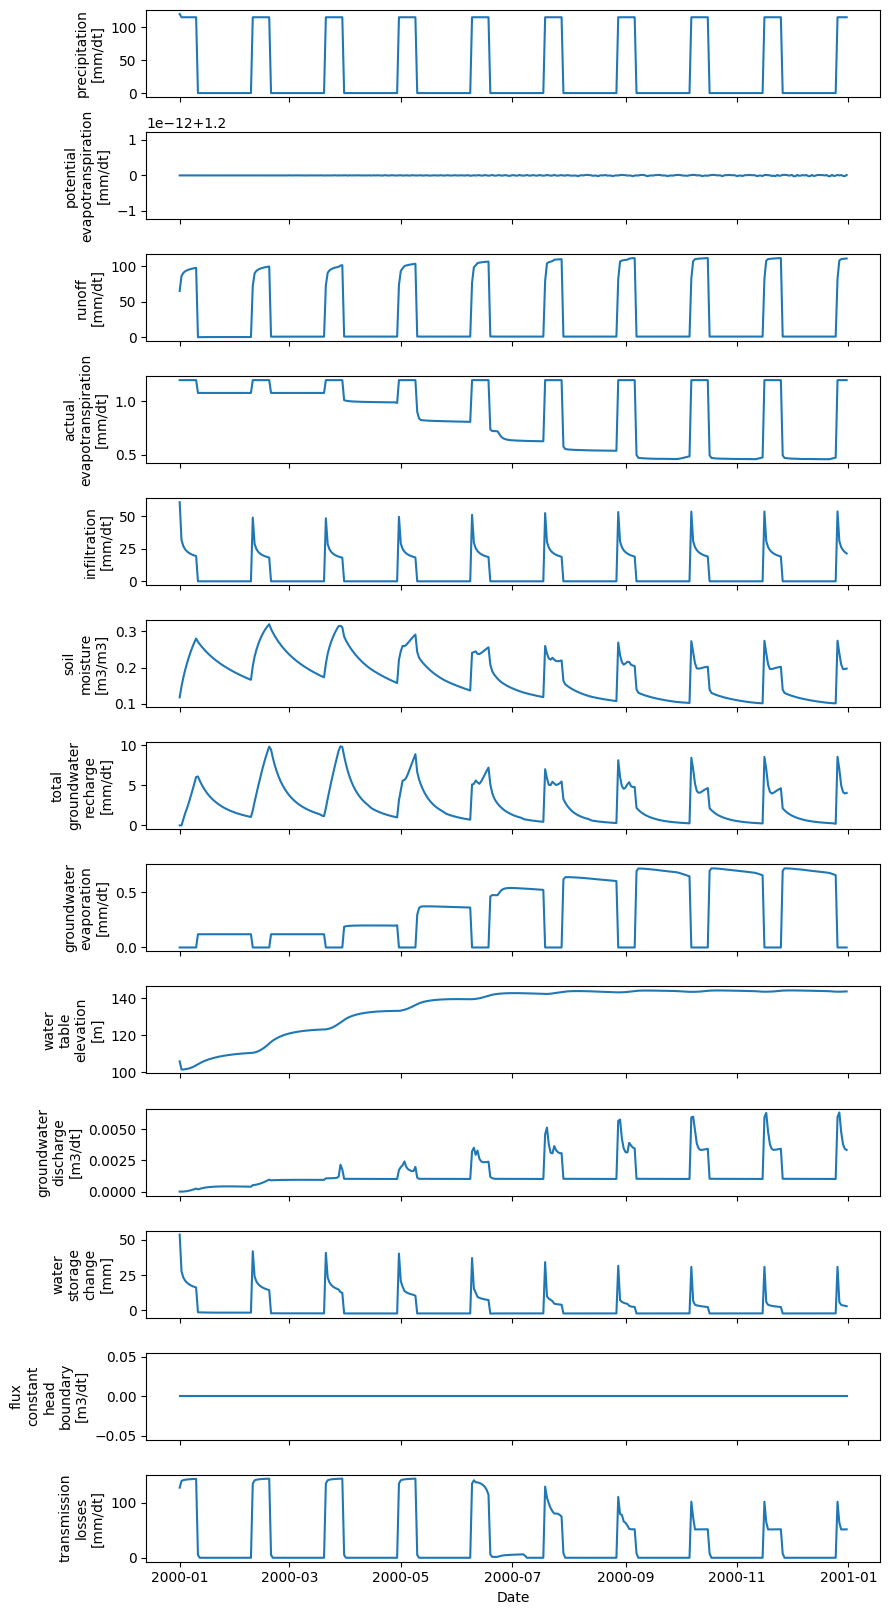

In [81]:
# Call function to plot average values of model outputs, it is *CSV file with "avg" at the end of the name
plotcwld.plot_avg_var(os.path.join(global_path, path_outputs.path_csv["avg"]), delta_t="D")

#### Plotting time series: point values at locations especified in the parameter file

Create a plot of model outputs at point locations. A time-series *CSV file is expected as input for the function below. The *CSV files at point locations contain a *p* in the name followed by the abbreviation of the variable. 

C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\cuwalid\tools\DRYP_plot_tools.py:213: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample(delta_t).mean().reset_index()
C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\cuwalid\tools\DRYP_plot_tools.py:215: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample(delta_t).mean(numeric_only=True).reset_index()


<Axes: xlabel='Date', ylabel='water\ntable\nelevation\n[m]'>

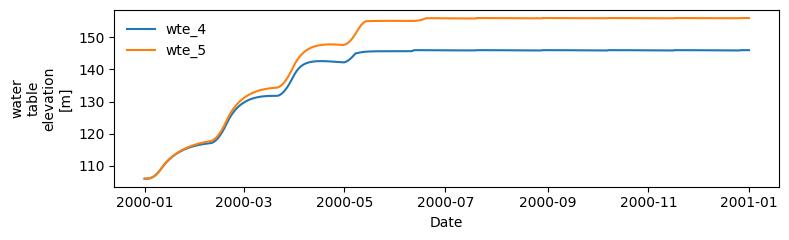

In [82]:
# call the function to plot point values at locations specified in the model parameter file
plotcwld.plot_point_var(os.path.join(global_path, path_outputs.path_csv["point"]["wte"]),
                        fields=["wte_4", "wte_5"],
                        delta_t="1H")

#### Plot profiles: chose between X or Y axis to create profile plot

<Axes: title={'center': 'Profile of water table elevation along axis X at index 1'}, xlabel='Longitude', ylabel='water table elevation [m]'>

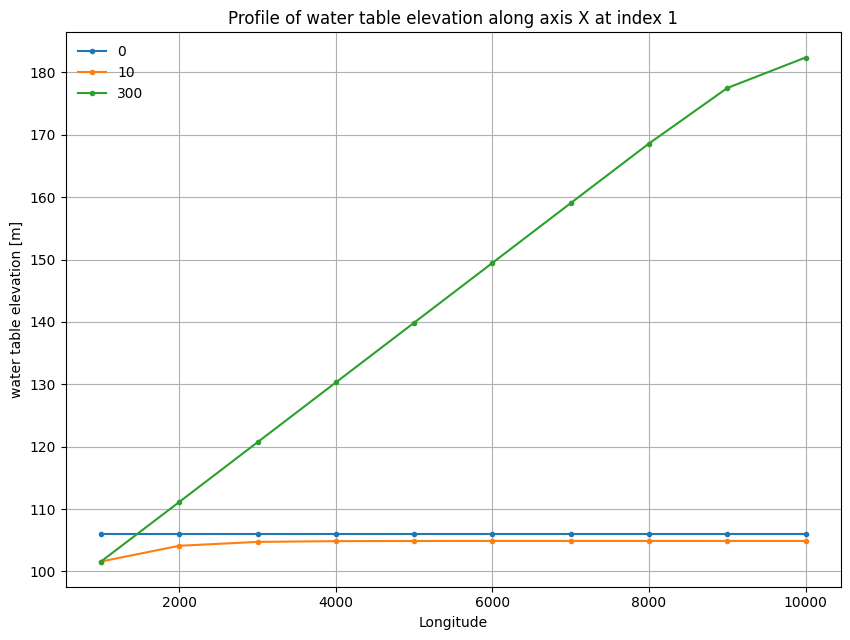

In [86]:
# get the path of the surface elevation (optional)
path_dem = os.path.join(global_path, path_paramters["path_input"], path_paramters["TERRAIN"]["path_dem"])#"path_dem.asc"

# get the path of the gridded output dataset
fname = os.path.join(global_path, path_outputs.path_grid["grid"])

# open the gridded dataset of model outputs
dataset = xr.open_dataset(fname)["wte"]

# call the profile plotting function
plotcwld.plot_profile(dataset, axis=1, time=[0, 10, 300], n=1, dem=None, bathymetry=None, title=None)

Plot maps

In [88]:
path_paramters

{'model_name': 'GW',
 'path_input': 'GW_1D/input/',
 'TERRAIN': {'path_dem': 'GW_1D_dem_m.asc',
  'path_fdl': 'GW_1D_flowdir_m.asc',
  'path_mask': 'GW_1D_mask_m.asc',
  'path_riv_len': 'GW_1D_riv_m.asc'},
 'UNSATURATED': {'path_uz_theta_sat': 'GW_1D_rawls_ne.txt',
  'path_uz_theta_res': 'GW_1D_rawls_theta_r.txt',
  'path_uz_theta_awc': 'GW_1D_rawls_awc.txt',
  'path_uz_theta_wp': 'GW_1D_rawls_wp.txt',
  'path_uz_root': 'GW_1D_depth_m.asc',
  'path_uz_lambda': 'GW_1D_rawls_n.txt',
  'path_uz_psi': 'GW_1D_rawls_phi.txt',
  'path_uz_ksat': 'GW_1D_rawls_ks0.txt',
  'path_uz_sigmaksat': 'GW_1D_rawls_sigma_ks.txt'},
 'SATURATED': {'path_sz_mask': 'GW_1D_mask_m.asc',
  'path_sz_ksat': 'GW_1D_rawls_ks0.txt',
  'path_sz_wte': 'GW_1D_wte_ini_2.asc',
  'path_sz_bc_head': 'GW_1D_CHB1.asc'},
 'METEO': {'path_pre': 'Pre_60m_00_05_sin.csv',
  'path_pet': 'Pre_60m_00_05_sin.csv'},
 'OUTPUT': {'path_out_sz': 'GW_1D_Flumes_points.csv',
  'path_out_uz': 'GW_1D_SM_points.csv',
  'path_out_oz': 'GW_1D_wel

## Tilted-V catchment model

This example will help you to understant surface groundwater interactions in the CUWALID modelling system.

![Model test reservoir](../figures/AQ_DRYP_GW_model_test.png)

In [89]:
# get path of model parameter setting file
path_input = os.path.join(global_path, "DynaVeg/DV_input.json")

In [90]:
# function to read a model parameter setting file as a dictionary
path_paramters = plotcwld.read_json_file(path_input)

# function to read all model ouputs paths as dictionary
path_outputs = pptools.get_output_filenames(path_input)

#### Plot model outputs

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


array([<Axes: ylabel='precipitation\n[mm/dt]'>,
       <Axes: ylabel='potential\nevapotranspiration\n[mm/dt]'>,
       <Axes: ylabel='runoff\n[mm/dt]'>,
       <Axes: ylabel='actual\nevapotranspiration\n[mm/dt]'>,
       <Axes: ylabel='infiltration\n[mm/dt]'>,
       <Axes: ylabel='soil\nmoisture\n[m3/m3]'>,
       <Axes: ylabel='total\ngroundwater\nrecharge\n[mm/dt]'>,
       <Axes: ylabel='groundwater\nevaporation\n[mm/dt]'>,
       <Axes: ylabel='water\ntable\nelevation\n[m]'>,
       <Axes: ylabel='groundwater\ndischarge\n[m3/dt]'>,
       <Axes: ylabel='water\nstorage\nchange\n[mm]'>,
       <Axes: ylabel='flux\nconstant\nhead\nboundary\n[m3/dt]'>,
       <Axes: xlabel='Date', ylabel='transmission\nlosses\n[mm/dt]'>], dtype=object)

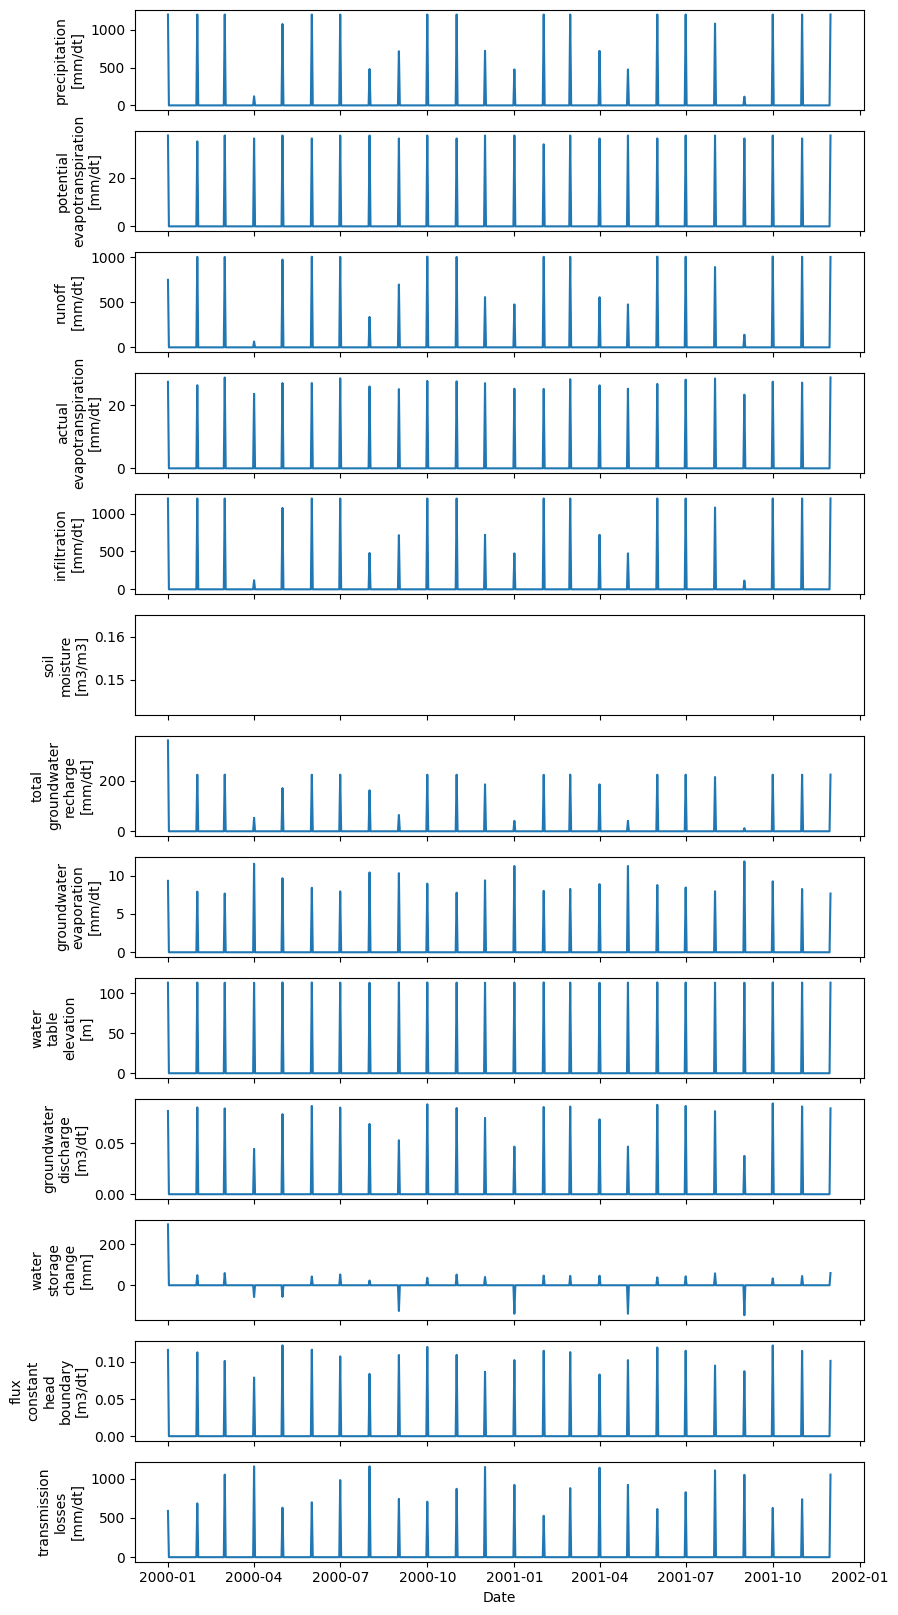

In [92]:
# Call function to plot average values of model outputs, it is *CSV file with "avg" at the end of the name
plotcwld.plot_avg_var(os.path.join(global_path, path_outputs.path_csv["avg"]), delta_t="D")

C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\cuwalid\tools\DRYP_plot_tools.py:213: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample(delta_t).mean().reset_index()
C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\cuwalid\tools\DRYP_plot_tools.py:215: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample(delta_t).mean(numeric_only=True).reset_index()


<Axes: xlabel='Date', ylabel='water\ntable\nelevation\n[m]'>

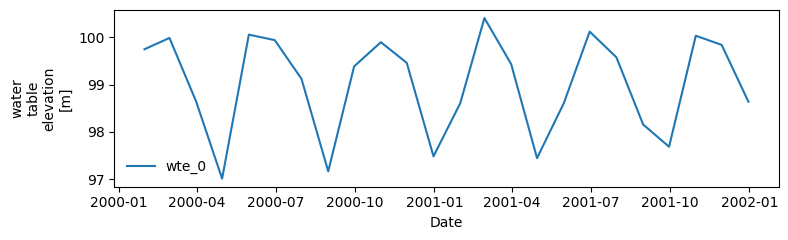

In [95]:
# call the function to plot point values at locations specified in the model parameter file
plotcwld.plot_point_var(os.path.join(global_path, path_outputs.path_csv["point"]["wte"]), fields=["wte_0"], delta_t="1M")

<Axes: title={'center': 'Profile of water table elevation along axis Y at index 5'}, xlabel='Latitude', ylabel='water table elevation [m]'>

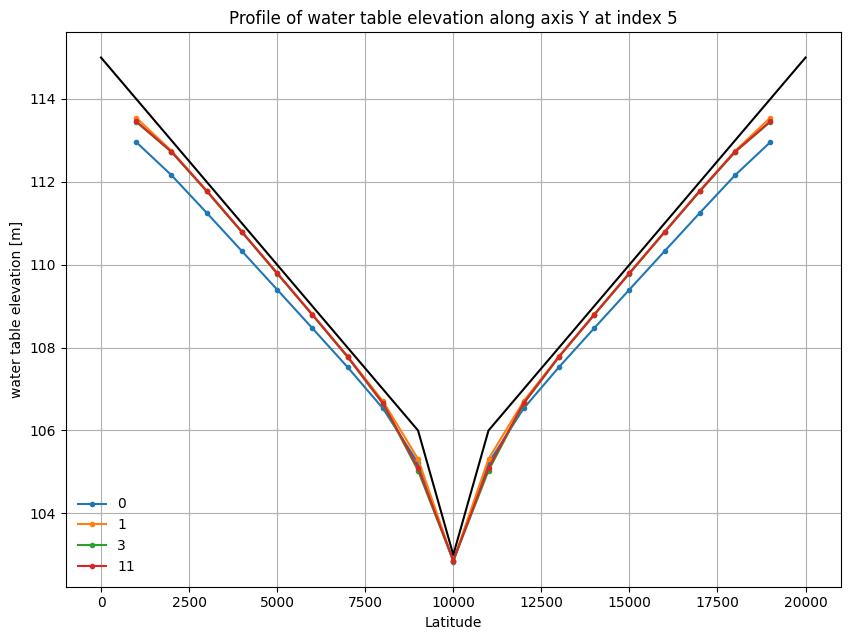

In [96]:
# get the path of the surface elevation (optional)
path_dem = os.path.join(global_path, path_paramters["path_input"], path_paramters["TERRAIN"]["path_dem"])#"path_dem.asc"

# Open raster data of the DEM
dem = rrtools.open_raster(path_dem)[0]

# get the path of the gridded output dataset
fname = os.path.join(global_path, path_outputs.path_grid["grid"])

# Open the gridded dataset of model outputs
dataset = xr.open_dataset(fname)["wte"]

# call the profile plotting function
plotcwld.plot_profile(dataset, axis=0, time=[0, 1, 3, 11], n=5, dem=dem, bathymetry=None, title=None)

### Adding vegetation characteristics properties

### Adding surface water bodies

### Adding irrigation/abstraction

## Reservoir model

You can include in the model large water bodies that interact with groundwater. The following example show how this can be added into the CUWALID-DRYP.

![Model test reservoir](../figures/AQ_DRYP_lake_geometry_3d.png)

In [97]:
# get path of model parameter setting file
path_input = os.path.join(global_path, "reservoir/LA_input_riv.json")

In [98]:
# function to read a model parameter setting file as a dictionary
path_paramters = plotcwld.read_json_file(path_input)

# function to read all model ouputs paths as dictionary
path_outputs = pptools.get_output_filenames(path_input)

#### Plot model outputs

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


array([<Axes: ylabel='precipitation\n[mm/dt]'>,
       <Axes: ylabel='potential\nevapotranspiration\n[mm/dt]'>,
       <Axes: ylabel='runoff\n[mm/dt]'>,
       <Axes: ylabel='actual\nevapotranspiration\n[mm/dt]'>,
       <Axes: ylabel='infiltration\n[mm/dt]'>,
       <Axes: ylabel='soil\nmoisture\n[m3/m3]'>,
       <Axes: ylabel='total\ngroundwater\nrecharge\n[mm/dt]'>,
       <Axes: ylabel='groundwater\nevaporation\n[mm/dt]'>,
       <Axes: ylabel='water\ntable\nelevation\n[m]'>,
       <Axes: ylabel='groundwater\ndischarge\n[m3/dt]'>,
       <Axes: ylabel='water\nstorage\nchange\n[mm]'>,
       <Axes: ylabel='flux\nconstant\nhead\nboundary\n[m3/dt]'>,
       <Axes: xlabel='Date', ylabel='transmission\nlosses\n[mm/dt]'>], dtype=object)

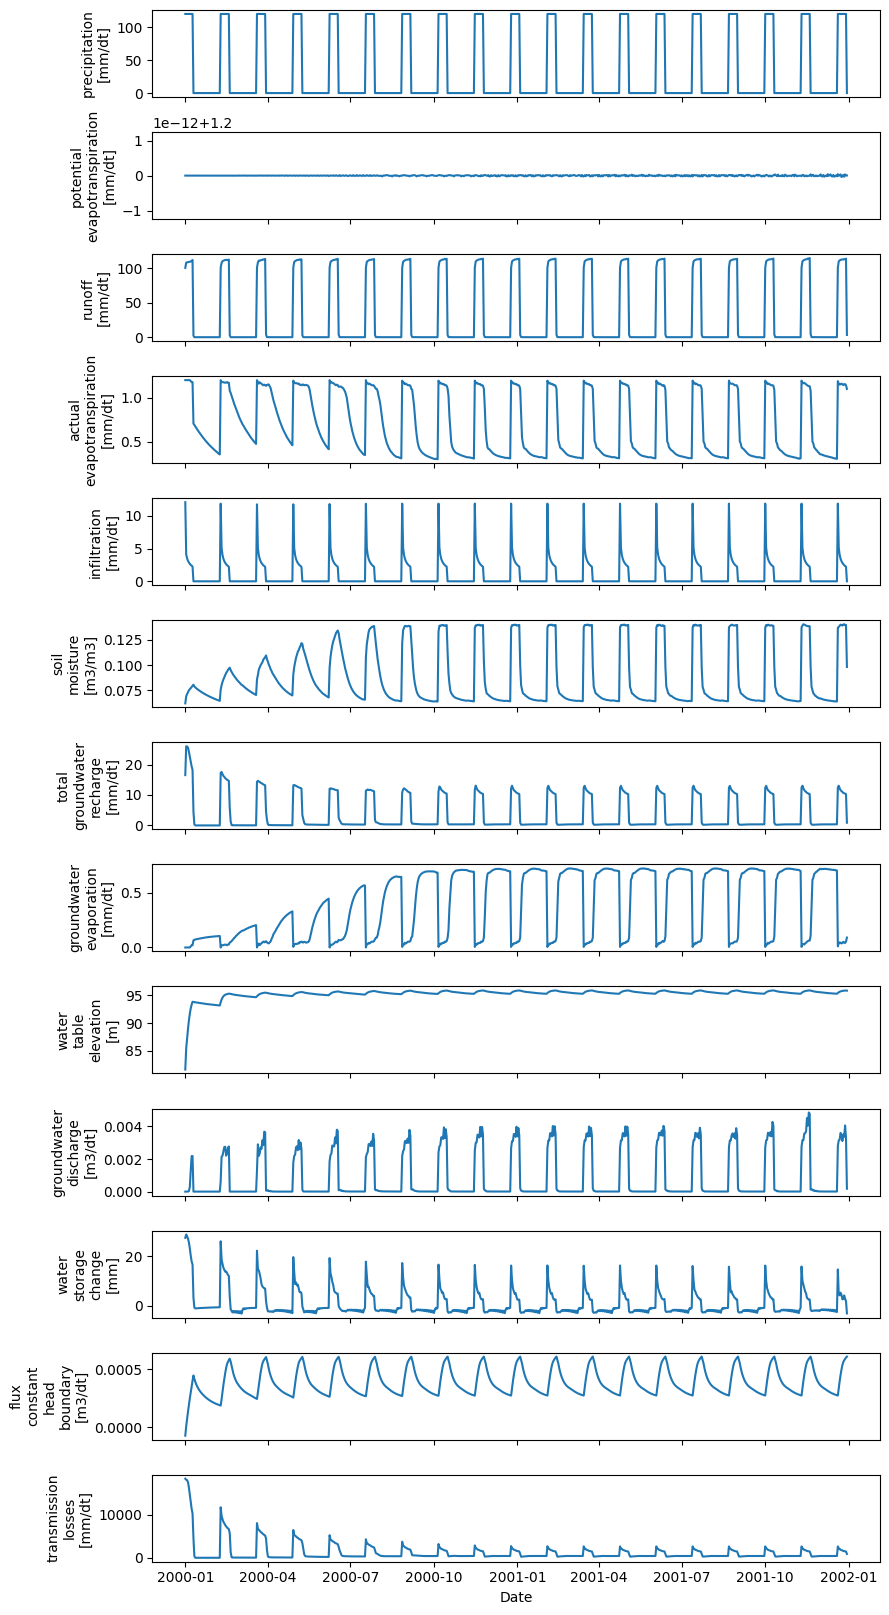

In [99]:
# Call function to plot average values of model outputs, it is *CSV file with "avg" at the end of the name
plotcwld.plot_avg_var(os.path.join(global_path, path_outputs.path_csv["avg"]), delta_t="1D")

<Axes: xlabel='Date', ylabel='water\ntable\nelevation\n[m]'>

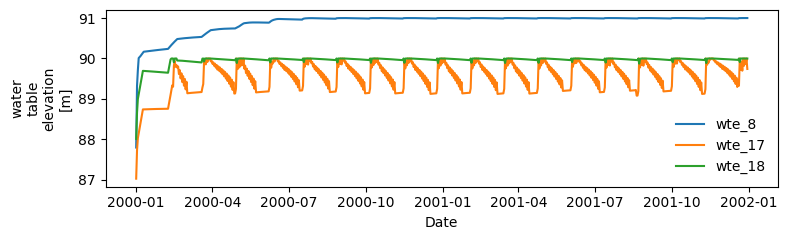

In [100]:
# call the function to plot point values at locations specified in the model parameter file
plotcwld.plot_point_var(os.path.join(global_path, path_outputs.path_csv["point"]["wte"]),
                        fields=["wte_8", "wte_17", "wte_18"],
                        delta_t="1D")

<Axes: title={'center': 'Profile of water table elevation along axis Y at index 15'}, xlabel='Latitude', ylabel='water table elevation [m]'>

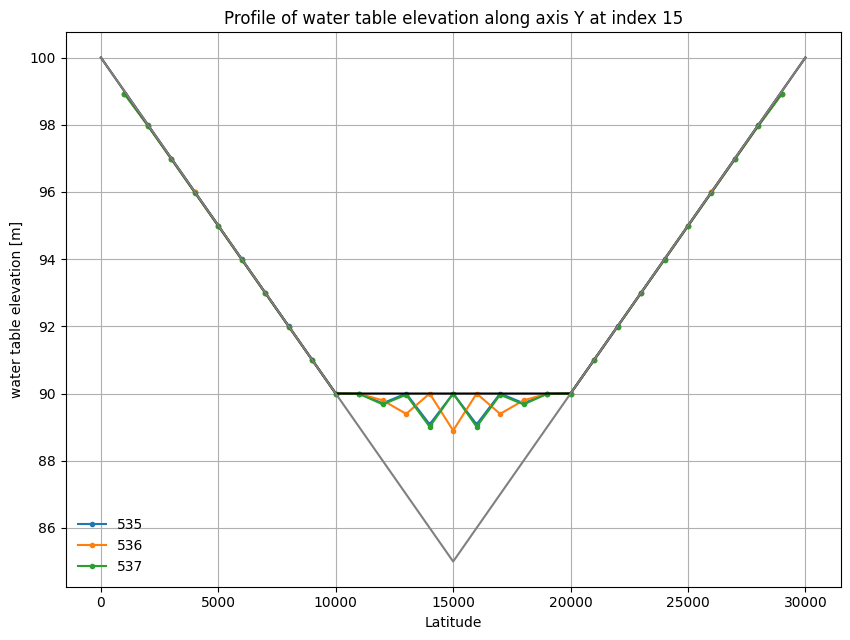

In [101]:
# get the path of the surface elevation (optional)
path_dem = os.path.join(global_path, path_paramters["path_input"], path_paramters["TERRAIN"]["path_dem"])#"path_dem.asc"

# get the path of the lake bathymetry (optional)
path_bathymetry = os.path.join(global_path, path_paramters["path_input"], path_paramters["WATER_BODIES"]["path_lake_depth"]) #"path_bathymetry.asc"

# Open raster data of the DEM
dem = rrtools.open_raster(path_dem)[0]

# Open raster data of lake bathymetry
bathymetry = rrtools.open_raster(path_bathymetry)[0]
# make sure that all values are nan for cells that are not lakes
bathymetry[bathymetry < 0] = np.nan
# calculate the lake bottom elevation
bathymetry = dem - bathymetry

# get the path of the gridded output dataset
fname = os.path.join(global_path, path_outputs.path_grid["grid"])

# Open the gridded dataset of model outputs
dataset = xr.open_dataset(fname)["wte"]

# call the profile plotting function
plotcwld.plot_profile(dataset, axis=0, time=list(range(535, 538)), n=15,
                      dem=dem, bathymetry=bathymetry, title=None)

In [102]:
path_paramters

{'model_name': 'reservoir',
 'path_input': 'reservoir/input/',
 'TERRAIN': {'path_dem': 'LA_dem_lakes.asc',
  'path_riv_width': 'LA_channel_width.asc',
  'path_riv_elev': 'LA_dem1.asc'},
 'SATURATED': {'path_sz_wte': 'Dams_1000m_avg_wte_ini.asc',
  'path_sz_bc_head': 'LA_CHB.asc',
  'path_sz_bottom': 'LA_botb.asc'},
 'METEO': {'path_pre': 'Pre_60m_00_05_sin.csv',
  'path_pet': 'Pre_60m_00_05_sin.csv',
  'path_TSWB': 'WB_abstractions1.csv'},
 'OUTPUT': {'path_out_sz': 'LA_points.csv',
  'path_out_uz': 'LA_points.csv',
  'path_out_oz': 'LA_points.csv',
  'path_output': 'reservoir/result',
  'path_setting': 'reservoir/LAr_par_setting.json'},
 'WATER_BODIES': {'path_lake_depth': 'LA_bathymetry.asc',
  'path_wb_bc_flux': 'LA_dam_abstractions1.csv'},
 'INTERCEPTION': {'path_veg_hs_savi': 'DynaVeg/input/SAVI_mes.csv',
  'path_veg_hs_par_a': 'DynaVeg/input/DV_lai_a.asc',
  'path_veg_hs_par_b': 'DynaVeg/input/DV_lai_b.asc',
  'path_veg_hs_savi_min': 'DynaVeg/input/DV_savi_min.asc',
  'path_veg_

## Multi-aquifer type (typologies) model

Groundwater systems may exhibit different hydraulic behaviors, requiring distinct modeling strategies. This example demonstrates how to incorporate aquifers with varying hydraulic characteristics using simple aquifer typologies. These typologies are defined by different transmissivity equations.

![Model test reservoir](../figures/AQ_DRYP_2D_Multi_aquifer_cross_section.png)

In [103]:
# get path of model parameter setting file
path_input = os.path.join(global_path, "multiaq/MA_input.json")

In [104]:
# function to read a model parameter setting file as a dictionary
path_paramters = plotcwld.read_json_file(path_input)

# function to read all model ouputs paths as dictionary
path_outputs = pptools.get_output_filenames(path_input)

#### Plot model outputs

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


array([<Axes: ylabel='precipitation\n[mm/dt]'>,
       <Axes: ylabel='potential\nevapotranspiration\n[mm/dt]'>,
       <Axes: ylabel='runoff\n[mm/dt]'>,
       <Axes: ylabel='actual\nevapotranspiration\n[mm/dt]'>,
       <Axes: ylabel='infiltration\n[mm/dt]'>,
       <Axes: ylabel='soil\nmoisture\n[m3/m3]'>,
       <Axes: ylabel='total\ngroundwater\nrecharge\n[mm/dt]'>,
       <Axes: ylabel='groundwater\nevaporation\n[mm/dt]'>,
       <Axes: ylabel='water\ntable\nelevation\n[m]'>,
       <Axes: ylabel='groundwater\ndischarge\n[m3/dt]'>,
       <Axes: ylabel='water\nstorage\nchange\n[mm]'>,
       <Axes: ylabel='flux\nconstant\nhead\nboundary\n[m3/dt]'>,
       <Axes: xlabel='Date', ylabel='transmission\nlosses\n[mm/dt]'>], dtype=object)

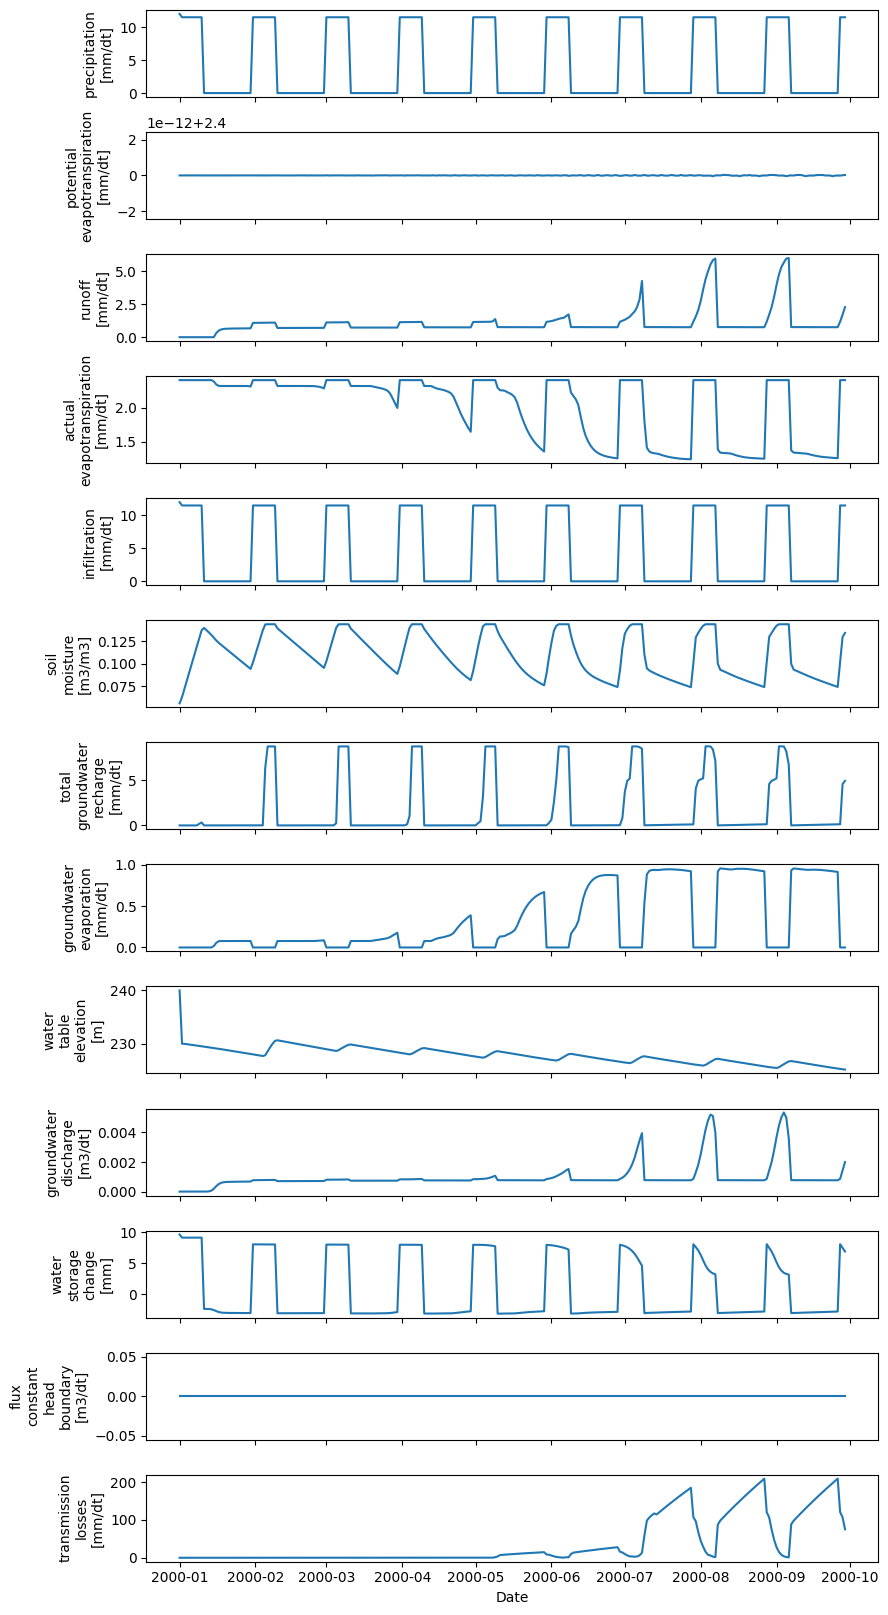

In [105]:
# Call function to plot average values of model outputs, it is *CSV file with "avg" at the end of the name
plotcwld.plot_avg_var(os.path.join(global_path, path_outputs.path_csv["avg"]))

C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\cuwalid\tools\DRYP_plot_tools.py:213: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample(delta_t).mean().reset_index()
C:\Users\Edisson\.conda\envs\tdryp\Lib\site-packages\cuwalid\tools\DRYP_plot_tools.py:215: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample(delta_t).mean(numeric_only=True).reset_index()


<Axes: xlabel='Date', ylabel='water\ntable\nelevation\n[m]'>

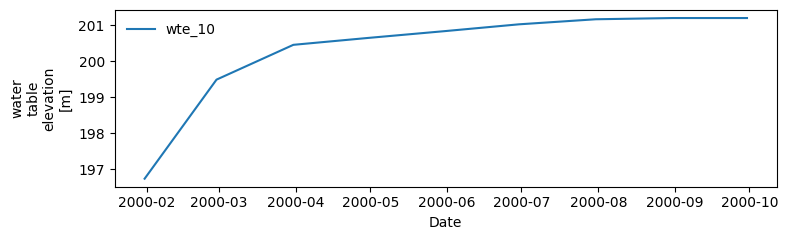

In [108]:
# call the function to plot point values at locations specified in the model parameter file
plotcwld.plot_point_var(os.path.join(global_path, path_outputs.path_csv["point"]["wte"]), fields=["wte_10"], delta_t="1M")

<Axes: title={'center': 'Profile of water table elevation along axis X at index 1'}, xlabel='Longitude', ylabel='water table elevation [m]'>

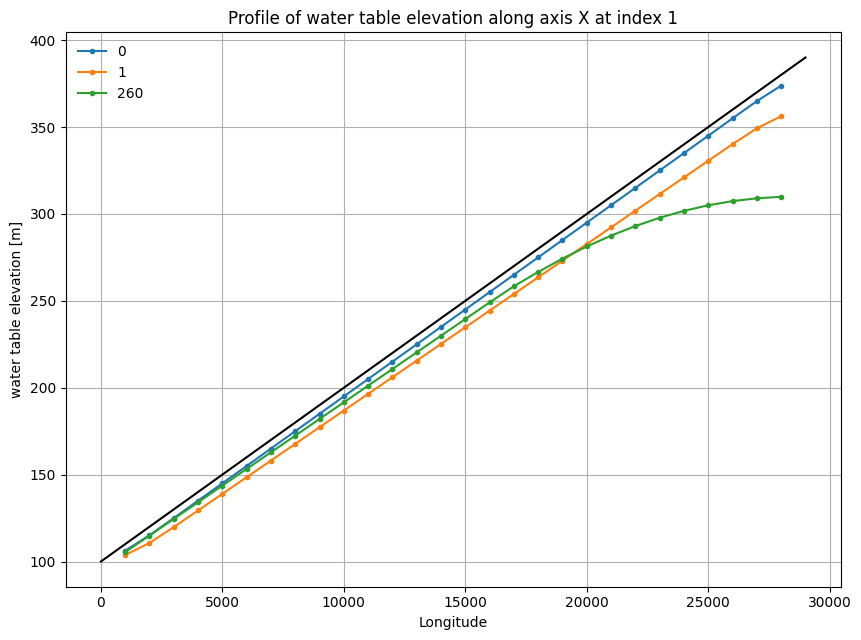

In [107]:
# get the path of the surface elevation (optional)
path_dem = os.path.join(global_path, path_paramters["path_input"], path_paramters["TERRAIN"]["path_dem"])#"path_dem.asc"

# Open raster data of the DEM
dem = rrtools.open_raster(path_dem)[0]

# get the path of the gridded output dataset
fname = os.path.join(global_path, path_outputs.path_grid["grid"])

# Open the gridded dataset of model outputs
dataset = xr.open_dataset(fname)["wte"]

# call the profile plotting function
plotcwld.plot_profile(dataset, axis=1, time=[0, 1, 260], n=1, dem=dem, bathymetry=None, title=None)